## Gradient Descent


This notebook demonstrates the gradient descent approach to determine the best fitting parameters by linear regression. 
Some of the python code is missing and should be completed by you. All the gaps are indicated with \*YOUR CODE\*.

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import sklearn.decomposition
import math
from sklearn import preprocessing

%matplotlib inline

Firtly, we demonstrate gradient descent on a simple linear regression problem with one dependent and one independent variable.

In [24]:
x_data = np.array([1,1,2,3,4,5,6,7,8,9,10,10])
y_data = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

x and y values are plotted in a diagram.

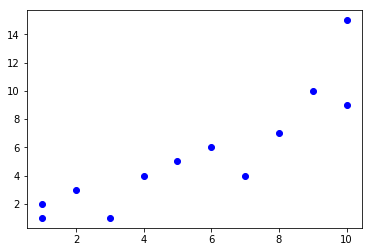

In [25]:
plt.plot(x_data,y_data,'bo')

We then try to fit the points by a straight line.

In [26]:
# y = theta_0 + theta_1 * x
theta_0 = -0.5
theta_1 = 1
y = lambda x: theta_1*x+theta_0

In [27]:
def plot_line(y, data_points):
    x_vals = [i for i in range(int(min(data_points)-1),int(max(data_points))+2)]
    y_vals = [y(x) for x in x_vals]
    plt.plot(x_vals,y_vals,'r')

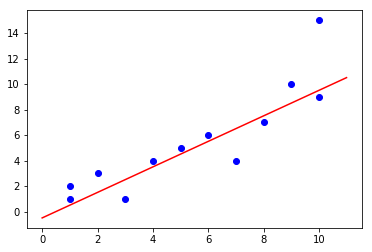

In [28]:
plot_line(y,x_data)
plt.plot(x_data,y_data,'bo')
plt.show()

In [29]:
alpha = 0.01

We define a cost function that determines the mean squared error of the predicted and the actual y coordinates. To get rid of the factor 2 in the gradient
formula, we divide the sum by 2.

In [30]:
def cost(y,x_data,y_data):
    tot = 0
    for i in range(1,len(x_data)):
        tot += (y(x_data[i]) - y_data[i]) ** 2;
    return tot/(2*len(x_data))

Next, we determine the gradient of y in respect to the parameters.

In [31]:
def summation(y,x_data,y_data):
    tot1 = 0
    tot2 = 0
    for i in range(1,len(x_data)):
        tot1 += y(x_data[i]) - y_data[i]
        tot2 += (y(x_data[i]) - y_data[i])*x_data[i]
    return tot1/len(x_data), tot2/len(x_data)

The gradient is leveraged to iteratively minimize the cost, as demonstrated in the figure below.

[1.8104358651620371, 1.7628141401333226, 1.7463177546213735, 1.7406025507252536, 1.7386217307649454, 1.7379344290134362, 1.7376951797933262, 1.7376111311749833, 1.7375808452596064, 1.737569186029895]


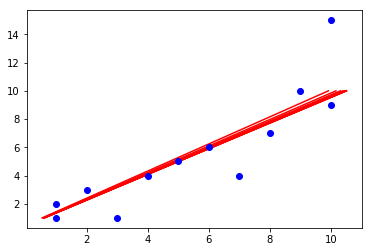

In [32]:
theta_0_data = [theta_0]
theta_1_data = [theta_1]
cost_data = []

for i in range(10):
    s1, s2 = summation(y,x_data,y_data)
    theta_0 = theta_0 - alpha * s1
    theta_1 = theta_1 - alpha * s2
    theta_0_data += [theta_0]
    theta_1_data += [theta_1]
    cost_data += [cost(y,x_data,y_data)]
    plt.plot(y(x_data),x_data, 'r-')
    
#print(theta_0_data,theta_1_data)
print(cost_data)
plt.plot(x_data,y_data,'bo')
plt.show()

We print out the best fitting parameters.

In [33]:
print("theta_0 = ",theta_0,"theta_1 = ", theta_1)

theta_0 =  -0.48791320495008783 theta_1 =  1.099889177652866


Now we want to visualize the gradient descent approach using contour lines. For that, we firstly define a function that determines the costs for all points
of a grid.

In [34]:

def parallel_cost(Theta0,Theta1,x_data,y_data):
    m = Theta0.shape[0]
    n = Theta0.shape[1]
    tot = np.zeros((m,n))
    for i in range(1,len(x_data)):
        tot += (Theta0 + Theta1*x_data[i] - y_data[i]) ** 2;
    return tot/(2*len(x_data))

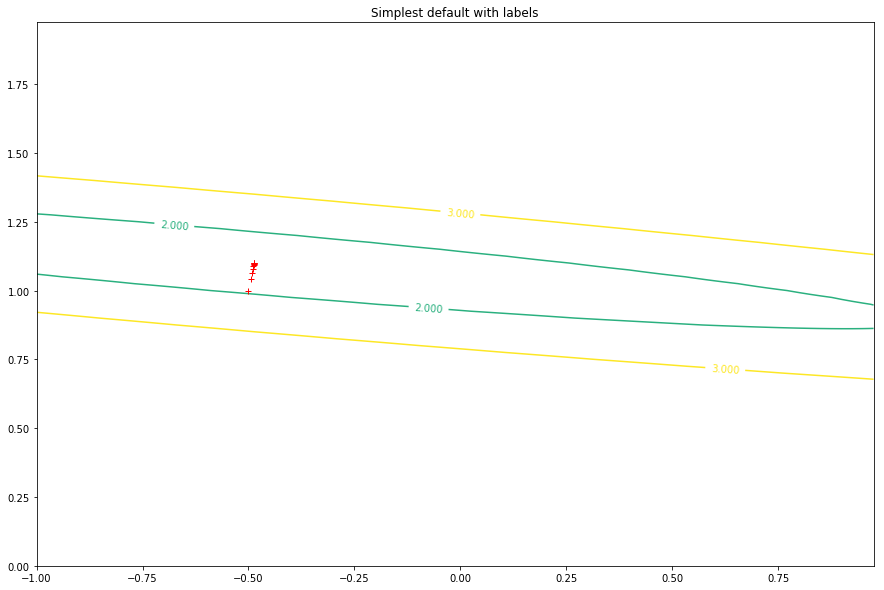

In [35]:
import matplotlib
import matplotlib.mlab as mlab

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-1.0, 1.0, delta)
y = np.arange(0.0, 2.0, delta)
Theta0, Theta1 = np.meshgrid(x, y)
Z = parallel_cost(Theta0,Theta1,x_data,y_data)

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure(figsize=(15,10))
CS = plt.contour(Theta0, Theta1, Z, levels = [0.25,0.5,1,2,3])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta_0_data, theta_1_data, 'r+', linewidth=3)
plt.title('Simplest default with labels')
plt.show()

## Multiple Regression Model

We will now use a multiple regression model with several dependent variables. For that, we will employ the matrix formulation: 
    $Y=X \Theta$. X is the matrix containing the values of the independent variables, where each row represents a feature vector. Y is the vector containing the values of the dependent variable and $\Theta$ is the parameter vector. We first define the cost functions. Firstly the version for visualizing the contour lines.

In [36]:
def parallel_cost_matrix(bias,Theta1,Theta2,x_data,y_data,take_square_root):
    m = Theta1.shape[0]
    n = Theta1.shape[1]
    tot = np.zeros((m,n))
    num_rows=y_data.shape[0]
    
    for i in range(0,num_rows):
       sum1= Theta1*x_data.iloc[i,1]
       sum2=Theta2*x_data.iloc[i,2]
       yestimated=bias+sum1+sum2
       diff=yestimated-y_data.iloc[i,0]
       diff2=diff*diff
       tot += diff2
    tot=tot/(2*num_rows)
    if take_square_root:
        tot=np.sqrt(tot)
    return tot

Next, the version for a single parameter vector. The cost function is defined as $\frac{1}{2m}(X\Theta-Y)^T(X\Theta-Y)$, where X is the feature matrix, Y the dependent variable and m the number of entries in the dataset. To calculate the costs, you need the python functions np.matmul() and np.transpose(). Note that the operator "*" specifies the pointwise matrix multiplication, also known as Hadamard product, and not the ordinary matrix multiplication you need here. For performance reason, you should implement this function based on matrix operations. <font color="red">Fill in the gap</font>


In [37]:
def cost_matrix(X,Y,thetas):
    return 1/(2*X.shape[0])*np.matmul(np.transpose(np.matmul(X,thetas)-Y),(np.matmul(X,thetas)-Y))
    

We determine the gradient of the loss in respect to the parameter vector $\Theta$  implementing the function:
$\frac{\delta L}{\delta \theta} = (1/m) X^{\top} (X\Theta-Y)$. Again, to obtain the optimal performance, you should directly employ matrix operations here. For that, you need the python functions np.matmul() and np.transpose(). <font color="red">Fill in the gap</font>


In [38]:
def gradient_matrix(X,Y,thetas):
    return (1/X.shape[0])*np.matmul(np.transpose(X),(np.matmul(X,thetas)-Y))
    

We now read an example file from hard disc containing  house prices and two assicated features (number of bedrooms and size). 
This data shall be used to train a multiple linear regression problem for predicting house prices.

In [39]:
dforig=pd.read_csv('house_prices.csv')
df=dforig

We split up this dataset into a matrix containing the independent variables size and bedrooms and the dependent variable price.

In [40]:
y=df[["Price"]]

To account for the bias parameter ($\Theta_0$ in the simple linear regression model), we add a columns containing only ones to the 
matrix of the independent variables. 

In [41]:
num_rows=df.shape[0]
a=[1]*num_rows
a=np.array(a)
a=np.reshape(a,(-1,1))

In [42]:
df['bias']=a
X=df[["bias","Size","Bedromms"]]

For comparision, we determine the optimal parameters using the normal equation.

In [43]:
def regression(X,y):
    Xt=np.transpose(X)
    XtX=np.matmul(Xt,X)
    XtXm1=np.linalg.inv(XtX)
    Xty=np.matmul(Xt,y)
    betas=np.matmul(XtXm1,Xty)
    return betas

We iteratively adjust the parameters by $\Theta_{new}:=\Theta-\alpha\cdot \frac{\delta L}{\delta \Theta} $ where $\alpha$ is the learning rate and L denotes the cost function. <font color="red">Fill in the gaps</font>

In [44]:

theta_0_data = [theta_0]
theta_1_data = [theta_1]

theta_comparison=regression(X,y)
print("theta retrieved by the normal equation: ",theta_comparison)

#initial guess
thetas=np.array([[90000],[200],[-9000]])

#learning rate
alpha=0.0000004

for i in range(10000):
    costs=cost_matrix(X,y,thetas)
    if i<=20 or i%100==0:
        print ("current costs: ",costs)
        print ("current thetas: ",thetas)
    thetas=thetas - alpha * gradient_matrix(X,y,thetas)    


theta retrieved by the normal equation:  [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
current costs:  [[1.0523795e+10]]
current thetas:  [[90000]
 [  200]
 [-9000]]
current costs:  [[8.14654144e+09]]
current thetas:  [[ 8.99999515e+04]
 [ 8.80185432e+01]
 [-9.00016168e+03]]
current costs:  [[6.43567955e+09]]
current thetas:  [[89999.99266261]
 [  183.01684423]
 [-9000.02441461]]
current costs:  [[5.20440641e+09]]
current thetas:  [[89999.95777716]
 [  102.42602598]
 [-9000.14075712]]
current costs:  [[4.31828372e+09]]
current thetas:  [[89999.98738647]
 [  170.79440612]
 [-9000.04195317]]
current costs:  [[3.68055891e+09]]
current thetas:  [[89999.96228231]
 [  112.79480358]
 [-9000.12566647]]
current costs:  [[3.2216011e+09]]
current thetas:  [[89999.98359376]
 [  161.99816145]
 [-9000.05454316]]
current costs:  [[2.89129834e+09]]
current thetas:  [[89999.96552901]
 [  120.25700571]
 [-9000.11477388]]
current costs:  [[2.65358603e+09]]
current thetas:  [[89999.98086865]
 [  

current costs:  [[2.04329482e+09]]
current thetas:  [[90000.01788952]
 [  139.41462376]
 [-8999.76671682]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.01867544]
 [  139.41461516]
 [-8999.7609951 ]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.01946129]
 [  139.41460656]
 [-8999.75527361]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.02024708]
 [  139.41459795]
 [-8999.74955235]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.02103279]
 [  139.41458935]
 [-8999.74383133]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.02181844]
 [  139.41458075]
 [-8999.73811053]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.02260402]
 [  139.41457214]
 [-8999.73238998]]
current costs:  [[2.04329482e+09]]
current thetas:  [[90000.02338953]
 [  139.41456354]
 [-8999.72666965]]
current costs:  [[2.04329481e+09]]
current thetas:  [[90000.02417498]
 [  139.41455494]
 [-8999.72094955]]
current costs:  [[2.04329481e+09]]
cu

Now we want to visualize contour lines and parameter convergence. <font color="red">Fill in the gaps</font>

In [45]:
# our initial guess
thetas=np.array([[90000],[200],[-9000]])
cost_data = []
alpha=0.0000003
all_thetas=[]
theta0=89597.9095428 
theta1_data=[]
theta2_data=[]
for i in range(50):
    # to check if you implemented the gradient function correctly, verify that the costs are continuously decreasing
    print ("costs: ",cost_matrix(X,y,thetas))
    print ("current thetas: ",thetas)
    s = gradient_matrix(X,y,thetas)
    thetas=thetas - alpha * gradient_matrix(X,y,thetas)    
    # since we only want to visualize the parameters theta1 and theta2 we keep the bias constant at its optimal value
    thetas[0]=theta0
    theta1_data.append(thetas[1])
    theta2_data.append(thetas[2])


costs:  [[1.0523795e+10]]
current thetas:  [[90000]
 [  200]
 [-9000]]
costs:  [[3.3274357e+09]]
current thetas:  [[89597.9095428 ]
 [  116.01390739]
 [-9000.12126075]]
costs:  [[2.23489497e+09]]
current thetas:  [[89597.9095428 ]
 [  148.69524316]
 [-9000.07398122]]
costs:  [[2.07189612e+09]]
current thetas:  [[89597.9095428 ]
 [  136.07193263]
 [-9000.09213661]]
costs:  [[2.04757791e+09]]
current thetas:  [[89597.9095428 ]
 [  140.94774196]
 [-9000.08501747]]
costs:  [[2.04394982e+09]]
current thetas:  [[89597.9095428 ]
 [  139.0644389 ]
 [-9000.08766073]]
costs:  [[2.04340853e+09]]
current thetas:  [[89597.9095428 ]
 [  139.79187288]
 [-9000.08653322]]
costs:  [[2.04332778e+09]]
current thetas:  [[89597.9095428 ]
 [  139.51089813]
 [-9000.08686219]]
costs:  [[2.04331573e+09]]
current thetas:  [[89597.9095428 ]
 [  139.61942572]
 [-9000.08662859]]
costs:  [[2.04331393e+09]]
current thetas:  [[89597.9095428 ]
 [  139.5775063 ]
 [-9000.08661228]]
costs:  [[2.04331367e+09]]
current thet

We define a helper function to speed up the visualization by filtering out parameter pairs lying outside the visual range.

In [46]:


def filter_range(li_theta1,li_theta2,theta1_low,theta1_upper,theta2_lower,theta2_upper):
    li_output1=[]
    li_output2=[]
    for (theta1,theta2) in zip(li_theta1,li_theta2):
        if theta1>=theta1_low and theta1<=theta1_upper and theta2>=theta2_lower and theta2<=theta2_upper:
            li_output1.append(theta1)
            li_output2.append(theta2)
    return (li_output1,li_output2)

(theta1_data,theta2_data)=filter_range(theta1_data,theta2_data,130,150,-10000,-8000)


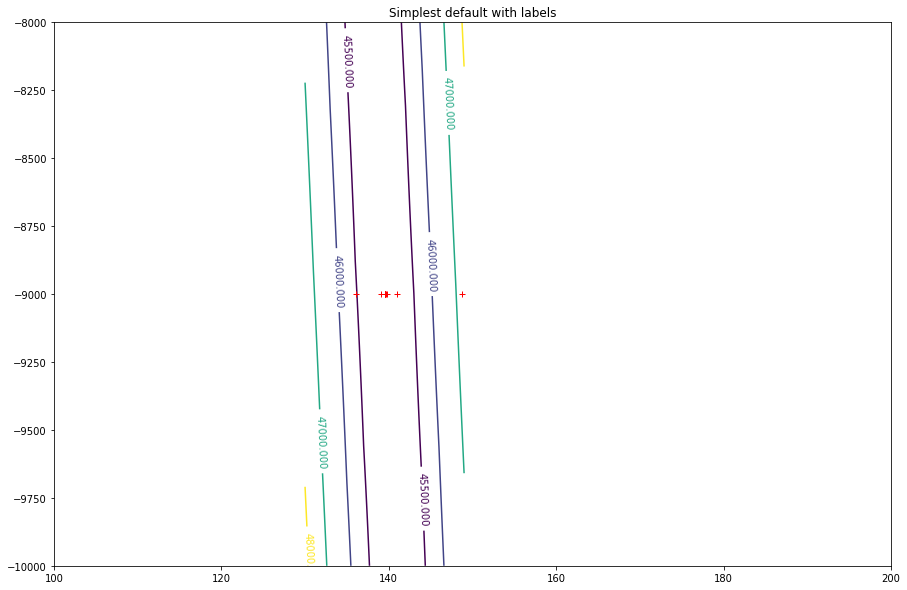

In [47]:
delta = 1
theta1_vals = np.arange(130, 150, delta)
theta2_vals = np.arange(-10000, -8000, delta)
Theta1_vals, Theta2_vals = np.meshgrid(theta1_vals, theta2_vals)
bias=89597.9095428
Z = parallel_cost_matrix(bias,Theta1_vals,Theta2_vals,X,y,True)


plt.figure(figsize=(15,10))
plt.xlim(100,200)
plt.ylim(-10000, -8000)
CS = plt.contour(Theta1_vals, Theta2_vals, Z, levels = [45500,46000,47000,48000])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta1_data,theta2_data, 'r+', linewidth=3)
plt.title('Simplest default with labels')
plt.show()


We see that the iso lines are almost paralell to each other. Now we scale all variables (dependent as well as independent) to the 
value range [0,1]. You can leverage the function preprocessing.MinMaxScaler to accomplish this. <font color="red">Fill in the gaps</font>

In [48]:
Xv = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
# MinMaxScaler.scale() standardizes the dataset (mean 0), transform() scales it to an explicit range (default [0,1]), define it with transform(feature_range=(min, max))
X_scaled = min_max_scaler.fit_transform(Xv)
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df[0]=1.0
print(X_scaled_df)

yv=y.values
# we also normalize y
y_scaled=min_max_scaler.fit_transform(yv)
print (y_scaled)
y_scaled_df=pd.DataFrame(y_scaled)
print (y_scaled_df)

      0         1     2
0   1.0  0.345284  0.50
1   1.0  0.206288  0.50
2   1.0  0.426917  0.50
3   1.0  0.155543  0.25
4   1.0  0.592388  0.75
5   1.0  0.312466  0.75
6   1.0  0.188086  0.50
7   1.0  0.158577  0.50
8   1.0  0.145615  0.50
9   1.0  0.177055  0.50
10  1.0  0.300055  0.75
11  1.0  0.316602  0.50
12  1.0  0.286266  0.50
13  1.0  1.000000  1.00
14  1.0  0.114727  0.50
15  1.0  0.399338  0.75
16  1.0  0.129068  0.25
17  1.0  0.105902  0.50
18  1.0  0.484556  0.75
19  1.0  0.600938  0.75
20  1.0  0.252344  0.50
21  1.0  0.285714  0.25
22  1.0  0.207391  0.50
23  1.0  0.306122  0.75
24  1.0  0.837838  0.50
25  1.0  0.068395  0.50
26  1.0  0.167126  0.50
27  1.0  0.461666  0.50
28  1.0  0.371760  0.50
29  1.0  0.492278  0.50
30  1.0  0.272201  0.25
31  1.0  0.040816  0.00
32  1.0  0.327634  0.75
33  1.0  0.630171  0.50
34  1.0  0.264479  0.75
35  1.0  0.161335  0.50
36  1.0  0.106729  0.50
37  1.0  0.353006  0.75
38  1.0  0.927468  0.75
39  1.0  0.361280  0.75
40  1.0  0.22393

c:\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For comparision, we print out the best fitting parameters $\Theta$ employing the normal equation:

In [49]:
betas=regression(X_scaled_df,y_scaled_df)
print ("costs: ",cost_matrix(X_scaled_df,y_scaled_df,betas))
print ("betas: ",betas)

costs:  [[0.00727405]]
betas:  [[ 0.05578752]
 [ 0.95241114]
 [-0.06594731]]


We now optimize the parameters employing gradient descent and print out the costs in every step to ensure they converge to the minimum. <font color="red">Fill in the gaps</font>

In [50]:
thetas=np.array([[0.05578752],[1.0],[-0.1]])
#thetas=np.array([[1],[1],[1]])
cost_data = []
alpha=1.0
all_thetas=[]
theta0=0.05578752
theta1_data=[]
theta2_data=[]
for i in range(100):
    print ("current thetas: ",thetas)
    s = gradient_matrix(X_scaled_df,y_scaled_df,thetas)
    thetas=thetas - alpha * s
    costs=cost_matrix(X_scaled_df,y_scaled_df, thetas)
    print ("costs: ",costs)
    
    # Since we want to focus on theta1 and theta2 we keep theta0 constant at its optimal value
    thetas[0]=theta0
    
    # add both theta values to lists for visualize the trajectory leading to the optimal parameter values
    theta1_data.append(thetas[1])
    theta2_data.append(thetas[2])
    


current thetas:  [[ 0.05578752]
 [ 1.        ]
 [-0.1       ]]
costs:  [[0.0073105]]
current thetas:  [[ 0.05578752]
 [ 0.99961788]
 [-0.09803669]]
costs:  [[0.00730908]]
current thetas:  [[ 0.05578752]
 [ 0.99890976]
 [-0.09664645]]
costs:  [[0.00730768]]
current thetas:  [[ 0.05578752]
 [ 0.99803527]
 [-0.0955768 ]]
costs:  [[0.00730626]]
current thetas:  [[ 0.05578752]
 [ 0.99708137]
 [-0.09468962]]
costs:  [[0.00730485]]
current thetas:  [[ 0.05578752]
 [ 0.99609529]
 [-0.09390927]]
costs:  [[0.00730346]]
current thetas:  [[ 0.05578752]
 [ 0.99510257]
 [-0.09319426]]
costs:  [[0.00730212]]
current thetas:  [[ 0.05578752]
 [ 0.99411691]
 [-0.09252173]]
costs:  [[0.00730082]]
current thetas:  [[ 0.05578752]
 [ 0.99314555]
 [-0.09187907]]
costs:  [[0.00729959]]
current thetas:  [[ 0.05578752]
 [ 0.99219219]
 [-0.09125919]]
costs:  [[0.0072984]]
current thetas:  [[ 0.05578752]
 [ 0.99125862]
 [-0.0906581 ]]
costs:  [[0.00729727]]
current thetas:  [[ 0.05578752]
 [ 0.99034558]
 [-0.0900

Filter out points outside the visual range.

In [51]:
(theta1_data,theta2_data)=filter_range(theta1_data,theta2_data,0.9,1.0,-0.1,0)

Finally, we visualize cost iso lines and the trajectory leading to the optimal parameter values. We notice that the contour lines are still elliptical but much more ressemble a circle than for the unnormalized variables.

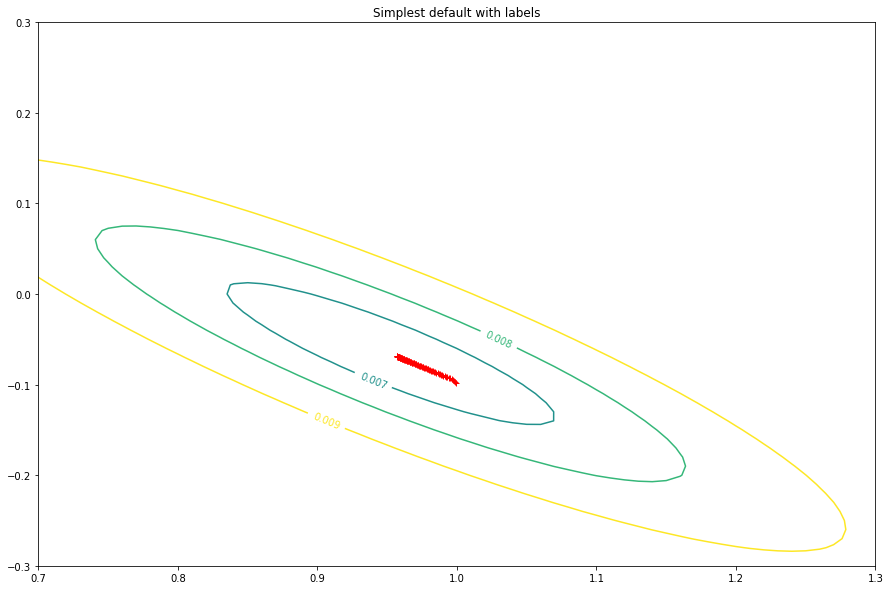

In [52]:
delta = 0.01
theta1_vals = np.arange(0.6, 1.4, delta)
theta2_vals = np.arange(-0.4, 0.4, delta)

Theta1_vals, Theta2_vals = np.meshgrid(theta1_vals, theta2_vals)
bias=0.05578752
Z = parallel_cost_matrix(bias,Theta1_vals,Theta2_vals,X_scaled_df,y_scaled_df,None)

plt.figure(figsize=(15,10))
plt.xlim(0.7, 1.3)
plt.ylim(-0.3, 0.3)
CS = plt.contour(Theta1_vals, Theta2_vals, Z, levels = [0.006,0.0065,0.007,0.0075,0.008,0.009])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta1_data,theta2_data, 'r+', linewidth=3)
plt.title('Simplest default with labels')
plt.show()